In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


# Load the dataset
file_path = 'smoking_health_data_final.csv'
data = pd.read_csv(file_path)

data.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [2]:
# Preprocess the data
# Fill missing values in 'cigs_per_day' with 0
data['cigs_per_day'].fillna(0, inplace=True)

# Split 'blood_pressure' into systolic and diastolic
data[['systolic_bp', 'diastolic_bp']] = data['blood_pressure'].str.split('/', expand=True)
data['systolic_bp'] = pd.to_numeric(data['systolic_bp'])
data['diastolic_bp'] = pd.to_numeric(data['diastolic_bp'])

# Drop original 'blood_pressure' column
data.drop('blood_pressure', axis=1, inplace=True)

# Fill missing cholesterol values with the mean
data['chol'].fillna(data['chol'].mean(), inplace=True)

# Encode categorical data: 'sex' and 'current_smoker'
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['current_smoker'] = data['current_smoker'].map({'yes': 1, 'no': 0})

In [3]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['current_smoker'])
y = data['current_smoker']

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

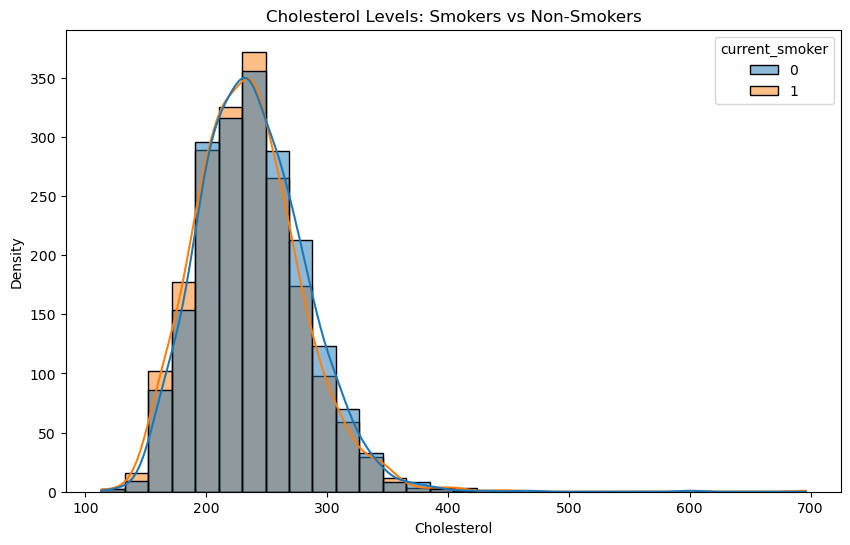

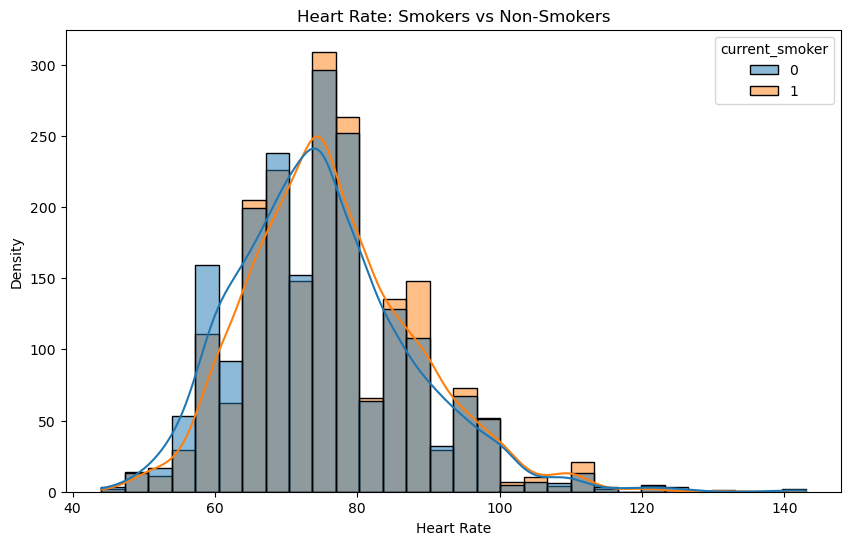

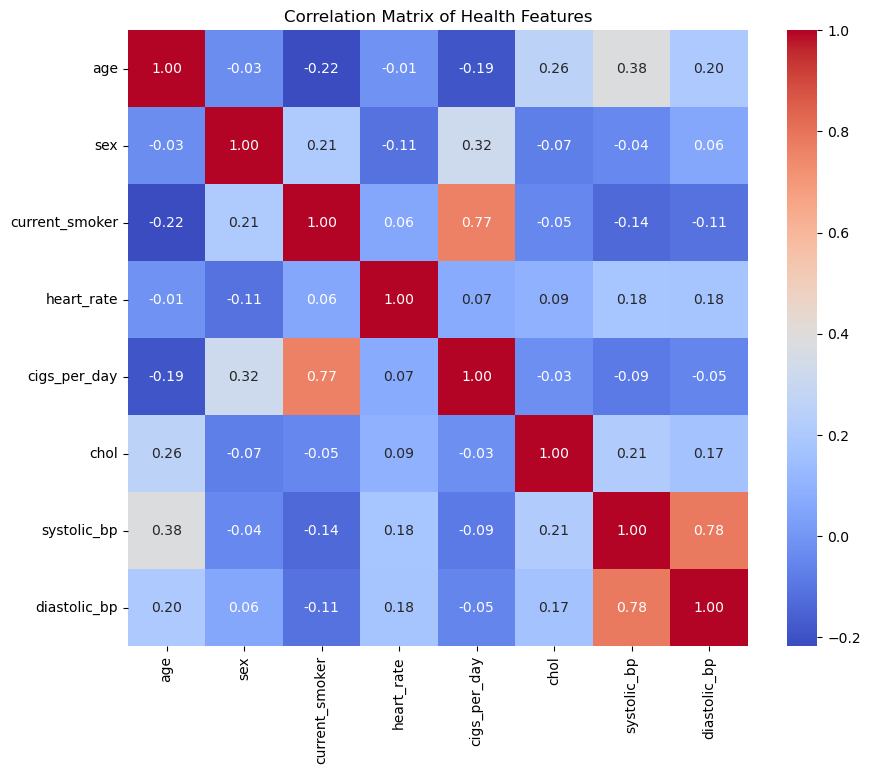

In [5]:
# Visualizations
# Distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chol', hue='current_smoker', kde=True, bins=30)
plt.title('Cholesterol Levels: Smokers vs Non-Smokers')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

# Heart rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='heart_rate', hue='current_smoker', kde=True, bins=30)
plt.title('Heart Rate: Smokers vs Non-Smokers')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health Features')
plt.show()

In [6]:
# Build a neural network using TensorFlow/Keras
def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [8]:
# Train and evaluate using cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = build_model(X_train.shape[1])
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    
    # Predict on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [9]:
# Average metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

# Print evaluation results
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')


Average Accuracy: 0.9933
Average Precision: 0.9995
Average Recall: 0.9871
Average F1 Score: 0.9932


In [10]:
# Final confusion matrix and classification report
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Pass the input shape to the build_model function
model_final = build_model(X_train_final.shape[1])

# Train the model
model_final.fit(X_train_final, y_train_final, epochs=50, batch_size=10, verbose=0)

# Predict on the test set
y_pred_final = (model_final.predict(X_test_final) > 0.5).astype("int32")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test_final, y_pred_final))

print("Classification Report:")
print(classification_report(y_test_final, y_pred_final))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[416   0]
 [  7 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       416
           1       1.00      0.98      0.99       364

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

